# Probability Questions 0 (from your excellent TA Morris)

1. How does the estimation procedure for finding the optimal value of the parameter(s) of a data model given data work? 

2. What are good working definitions for the likelihood and prior? 

*Likelihood: A function of the parameter $\theta$ of a data model $f_\theta(x_i)$ which defines the value of $\prod_{i=1}^n f_\theta(x_i)$ the (joint) density (or probability) for the observed continuous (or discrete) data $x$ at the value $\theta$.*

*A prior is our beliefs about the possible values of parameters, most likely expressed as a density or probability mass function (since this provides a most expeditious language to express these beliefs).*

<!--
    1. The terms "data" and "parameters" or "model" might be useful in the likelihood definition
    2. The terms "probability" or "belief" might be useful in the prior definition
-->
3. What does introducing a prior mean in terms of choosing a model and its parameters?

*Nothing: the data model and the experiment together dictate the parameters of interest; ny prior beliefs about the parameters is then expressed; then data is collected and the posterior updated; this encodes our updated beliefs from which posterior belief statements may be made.*

4. What is "certainty" or "level of belief" in how do you express it?

# Probability Questions 1

---

1. Estimate $\Pr(a \leq X \leq b)$ for $X \sim \textrm{beta}(\alpha,\beta)$ by sampling from a beta distribution 
2. Express this statement as an expectation with $f(x)$ the beta density in question 


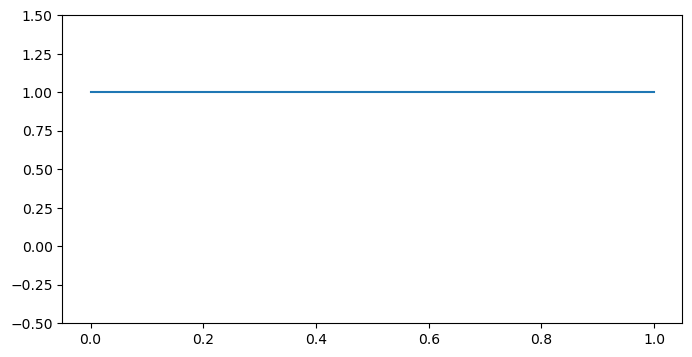

In [1]:
from scipy import stats
import numpy as np; import matplotlib.pyplot as plt

alpha,beta = 1,1; parameter_domain = np.linspace(0,1,1000)
prior = stats.beta(a=alpha,b=beta)

plt.figure(figsize=(8,4)); plt.ylim([-0.5,1.5])
plt.plot(parameter_domain, prior.pdf(parameter_domain));

In [2]:
prior.cdf(.2)

0.2

In [9]:
prior.rvs(10)

array([0.81165792, 0.51188602, 0.33642412, 0.65692545, 0.61684416,
       0.35897628, 0.51149543, 0.78417983, 0.13617177, 0.33689585])

In [8]:
m = 10000
(prior.rvs(m) < 0.2).mean()

0.2002

## Monte Carlo Integration
### All Bayesian estimates are just Monte Carlo Integration...

$$
\Large
\begin{align*}
\Pr(a\leq X\leq b)  {} = & \int_a^b f(x) dx \\
{} = & \int 1_{[a,b]}(x) f(x) dx = \mathrm{I\!E}[1_{[a,b]}(x_i)]\\
& \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\;\;\;\approx \frac{1}{n} \sum_{i=1}^n 1_{[a,b]}(x_i)
\end{align*}
$$


0.317 0.014714312760030625 0.32157197000000004


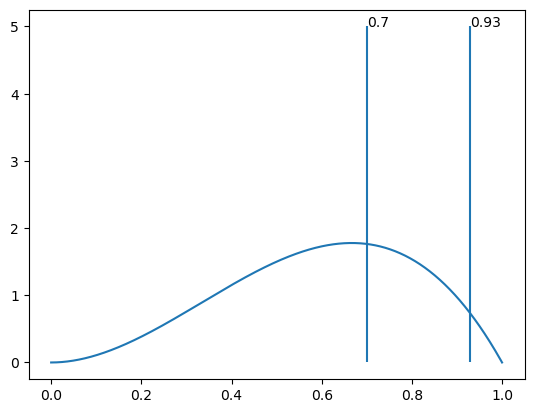

In [19]:
# This is the (reorganized) code I produced throughout the lecture

alpha,beta = 3,2 # arbitrary
a,b = .7,.93  # arbitrary
my_beta = stats.beta(alpha,beta)

u_grid = np.linspace(0,1,1001)
plt.plot(u_grid, my_beta.pdf(u_grid))
plt.vlines([a,b],0,5)
for x,y,s in zip([a,b],[5,5],[str(a),str(b)]):
    plt.text(x,y,s)

m = 1000  # Monte Carlo samples
x = my_beta.rvs(m) 

in_interval = (x >= a) & (x <= b)  # 0/1 outcomes
# alternative code: in_interval = in_interval = (x >= a) and (x <= b)

print(in_interval.mean(),  # an average!
      # so it has a standard error...
      in_interval.std()/m**0.5,  # m not n!!!
      my_beta.cdf(b)-my_beta.cdf(a))


# Diversion 1: Likelihoods

---


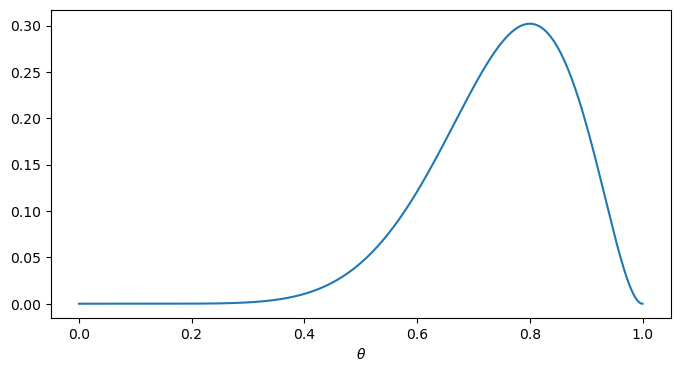

In [31]:
n, x = 10, 8  # p_=0.75; stats.binom(n=n, p=p_).rvs()
likelihood = lambda theta: stats.binom(n=n, p=theta).pmf(x)

plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
plt.plot(parameter_domain, likelihood(parameter_domain));

# Diversion 2: Posteriors

---

$$
\Large
\begin{align*}
\overset{posterior}{p(\theta|x)} &={} \frac{\overset{likelihood}{p(x|\theta)}\times \overset{prior}{p(\theta)}}{\overset{\text{evidence}}{p(x)}}\\
\end{align*}
$$

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**


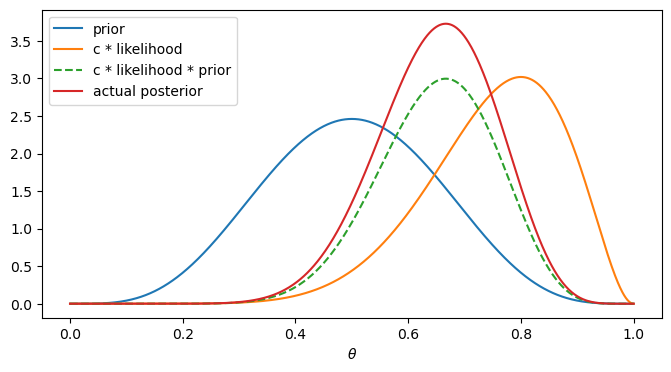

In [102]:
plt.figure(figsize=(8,4))

alpha,beta = 5,5; parameter_domain = np.linspace(0,1,1001)
prior = stats.beta(a=alpha,b=beta)

plt.plot(parameter_domain, prior.pdf(parameter_domain), 
         label='prior')

n,x = 10,8  # p_=0.75; stats.binom(n=n, p=p_).rvs()
likelihood = lambda p: stats.binom(n,p=p).pmf(x)

c = 10
plt.plot(parameter_domain, c*likelihood(parameter_domain),
         label='c * likelihood')
plt.plot(parameter_domain, 
         c*likelihood(parameter_domain)*prior.pdf(parameter_domain),
         label='c * likelihood * prior', linestyle="--")

posterior = stats.beta(a=alpha+x,b=beta+n-x)

plt.plot(parameter_domain, posterior.pdf(parameter_domain), 
         label='actual posterior')

plt.legend(); plt.xlabel('$\\theta$');

# Probability Questions 2

---

1. Estimate $\Pr(a \leq \theta \leq b | x)$ for $\theta \sim \textrm{beta}(\alpha+x,\beta+n-x)$ based on sampling 
2. What values for $a$ and $b$ solve $\Pr(a \leq \theta \leq b | x) = 0.95$ for $\theta \sim \textrm{beta}(\alpha+x,\beta+n-x)$?
3. What is your best guess of the values for $a$ and $b$ that solve $\Pr(a \leq \theta \leq b | x) = 0.95$ for $\theta \sim \textrm{beta}(\alpha+x,\beta+n-x)$ if you only have a sample from the beta distribution?


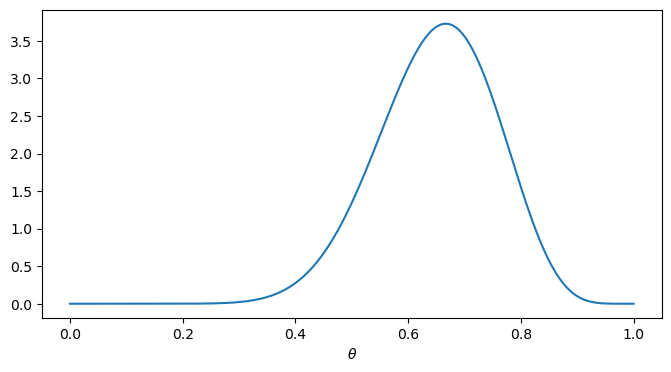

In [4]:
plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
posterior = stats.beta(a=alpha+x, b=beta+n-x)
plt.plot(parameter_domain, posterior.pdf(parameter_domain));

In [ ]:
# Same (reorganized) code I produced throughout the lecture
# with the following change

#alpha,beta = 3,2 # arbitrary
#a,b = .7,.93  # arbitrary
#my_beta = stats.beta(alpha,beta)
n,x = 10,8
my_beta = stats.beta(alpha+x,beta+n-x)
a,b = my_beta.ppf(.025),my_beta.ppf(.975)

u_grid = np.linspace(0,1,1001)
plt.plot(u_grid, my_beta.pdf(u_grid))
plt.vlines([a,b],0,5)
for x,y,s in zip([a,b],[5,5],[str(a),str(b)]):
    plt.text(x,y,s)

m = 1000  # Monte Carlo samples
x = my_beta.rvs(m) 

in_interval = (x >= a) & (x <= b)  # 0/1 outcomes
print(in_interval.mean(), 
      in_interval.std()/m**0.5,  # m not n!!!
      my_beta.cdf(b)-my_beta.cdf(a))


In [103]:
posterior_m = posterior.rvs(m)
sorted(posterior_m)[int(m/40)], sorted(posterior_m)[-int(m/40)]
# my_beta.ppf(.025),my_beta.ppf(.975)  # truth

(0.43876120355281634, 0.8383837760707079)

## Bayesian Credible Interval
$$\Large
\begin{align*}
\underset{\text{e.g., $\alpha=0.05$}}{(1-\alpha)} &\approx{} \int_a^b  p(\theta|x) d\theta \\ & {} \quad \quad  \text{ for } \quad \underset{\text{where $\theta_{(k)}$ is the $k^{th}$ rank ordered posterior sample}}{a=\theta_{\left(\left\lfloor m\times\frac{\alpha}{2}\right\rfloor\right)} \text{ and } b=\theta_{\left(\left\lceil m\times(1-\frac{\alpha}{2})\right\rceil\right)}}
\end{align*}
$$

In [104]:
# Set this to be exact for our sample
(posterior_m < sorted(posterior_m)[int(m/40)]).mean()

0.025

In [112]:
# Set this to be exact for our sample
(posterior_m < sorted(posterior_m)[-int(m/40)]).mean()

0.975

In [117]:
# But these choices are Monte Carlo estimates 
# with standard error given by
(posterior_m < sorted(posterior_m)[int(m/40)]).std()/m**0.5

0.004937104414532875

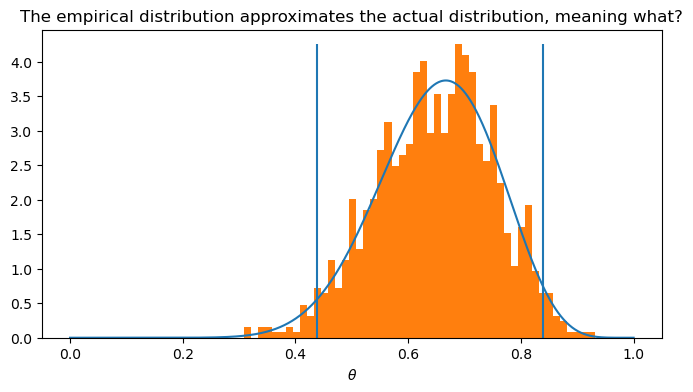

In [119]:
plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
plt.title("The empirical distribution approximates the actual distribution, meaning what?")
plt.plot(parameter_domain, posterior.pdf(parameter_domain));
hist = plt.hist(posterior_m, bins=50, density=True)

# Uncommenting this to see the Bayesian Credible interval
#plt.vlines([sorted(posterior_m)[int(m/40)],
#            sorted(posterior_m)[-int(m/40)]],0,hist[0].max()); 

5. What does the fact that the empirical distribution approximates the actual distribution allow us to do?
6. Why might this be useful?
7. How is this different than calculating probabilities from mathematical definitions of a distribution?
8. Why is Bayesian inference different from Frequentist inference?


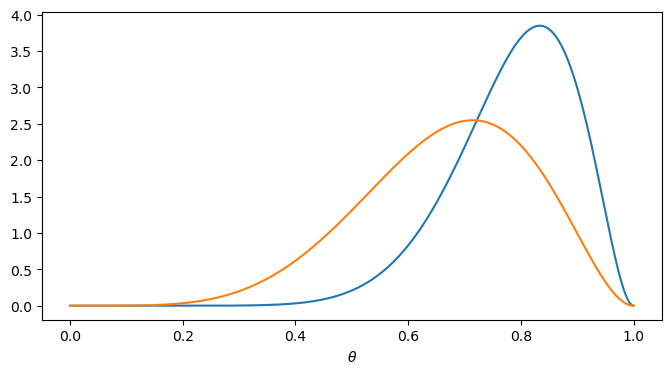

In [10]:
# Let's compare two distributions...

alpha,beta = 3,1; parameter_domain = np.linspace(0,1,1000)
prior = stats.beta(a=alpha,b=beta)

n1,x1 = 10,8  
posterior1 = stats.beta(a=alpha+x1,b=beta+n1-x1)
n2,x2 = 5,3  
posterior2 = stats.beta(a=alpha+x2,b=beta+n2-x2)

plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
plt.plot(parameter_domain, posterior1.pdf(parameter_domain))
plt.plot(parameter_domain, posterior2.pdf(parameter_domain));


9. What is $\Pr(\theta_1<\theta_2|x1,x2) = \int\int 1_{\theta_1 < \theta_2}(\theta_1, \theta_2) p(\theta_1|x1)p(\theta_2|x2) d \theta_1 d \theta_2$?
10. What is the chance that a single sample $\theta_1^{(m)}$ is less than another single sample $\theta_2^{(m)}$?
11. What is the density $f(\theta_1 \div \theta_2)$?

# Homework

---

### Q1

Complete the code below showing the sequential posterior distributions created as each observation is actualized.

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Binomial}\\\\
\text{Prior} && \underset{\texttt{Uniform}}{\overset{\texttt{Discrete}}{p(\theta)}} &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \text{for }\theta=\frac{i}{100}\text{ for } i = 0,1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\ 
\text{Posterior} && p(\theta|x,n) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

**Solution:**

#### **Bayes' Theorem**

The posterior is derived using:
$$p(\theta|x) = \frac{p(x|\theta) \cdot p(\theta)}{p(x)}$$
where:
- $p(x|\theta)$: **Likelihood** of observing the data given $\theta$.
- $p(\theta)$: **Prior** belief about $\theta$.
- $p(x)$: **Marginal likelihood** (normalization constant).

---

#### **Step-by-Step Derivation**
1. **Prior**:  
   Discrete uniform over $\theta = 0.00, 0.01, \dots, 1.00$\):  
   $$p(\theta) = \frac{1}{101} \quad \text{for all } \theta \in \{0, 0.01, \dots, 1\}.$$

2. **Likelihood**:  
   For a **single observation** $x \in \{0,1\}$, the Bernoulli likelihood is:  
   $$p(x|\theta) = \theta^x (1-\theta)^{1-x}.$$
   - If $x=1$: $p(x|\theta) = \theta$ (success).  
   - If $x=0$: $p(x|\theta) = 1-\theta$ (failure).  

3. **Joint Distribution**:  
   Multiply prior and likelihood:  
   $$p(\theta, x) = p(x|\theta) \cdot p(\theta) = \theta^x (1-\theta)^{1-x} \cdot \frac{1}{101}.$$

4. **Normalization**:  
   Compute $p(x)$ (sum over all $\theta$):  
   $$p(x) = \sum_{\theta} p(\theta, x) = \frac{1}{101} \sum_{i=0}^{100} \left(\frac{i}{100}\right)^x \left(1-\frac{i}{100}\right)^{1-x}.$$

5. **Posterior**:  
   Normalize the joint distribution:  
   $$p(\theta|x) = \frac{p(\theta, x)}{p(x)} = \frac{\theta^x (1-\theta)^{1-x}}{\sum_{i=0}^{100} \left(\frac{i}{100}\right)^x \left(1-\frac{i}{100}\right)^{1-x}}.$$

Thus, the posterior is a **discrete categorical distribution** over $\theta = 0.00, 0.01, \dots, 1.00$.

In [7]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

print("Imports done!")

Imports done!


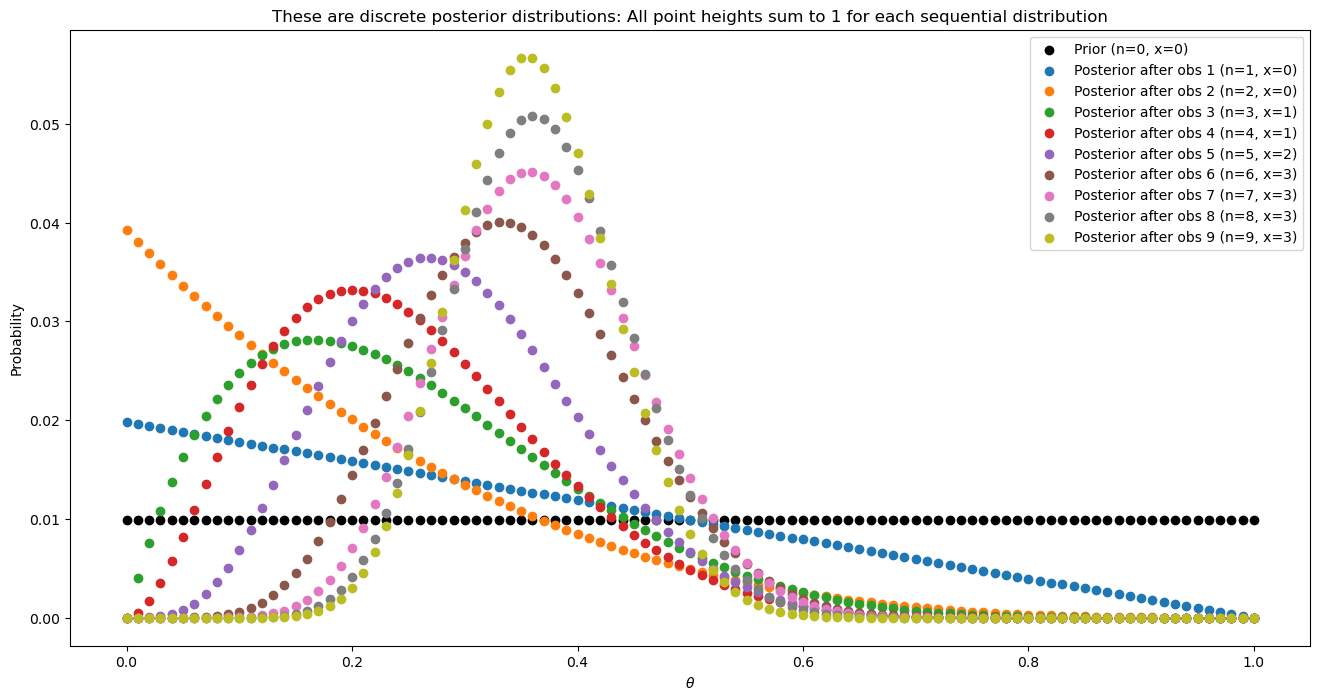

In [11]:
# Q1
parameter_domain = np.linspace(0,1,101) 
prior = np.ones(101)/101  # Discrete uniform over 101 points

# Observations in sequence (0 = failure, 1 = success):
observations = [0, 0, 1, 0, 1, 1, 0, 0, 0]

n, x = 0, 0  # Initialize counters for total trials (n) and total successes (x)

plt.figure(figsize=(16,8))
plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")
plt.scatter(parameter_domain, prior, 
            label=f"Prior (n={n}, x={x})", color='k', marker='o')

for i, obs in enumerate(observations):
    # Update n and x based on the new observation
    n += 1
    x += obs
    
    # Compute the binomial likelihood for each possible theta in parameter_domain
    # p(x | theta, n) = C(n,x) * theta^x * (1-theta)^(n-x), but the constant C(n,x) is the same for all theta
    # so we can omit it in the multiplication (we'll normalize anyway).
    likelihood = parameter_domain**x * (1 - parameter_domain)**(n - x)
    
    # Posterior (unnormalized) = likelihood * prior
    posterior_unnorm = likelihood * prior
    
    # Normalize to make it a proper pmf
    posterior = posterior_unnorm / posterior_unnorm.sum()
    
    # Plot the updated posterior
    plt.scatter(parameter_domain, posterior, 
                label=f"Posterior after obs {i+1} (n={n}, x={x})")
    
    # The new posterior becomes the prior for the next iteration
    prior = posterior

plt.xlabel(r"$\theta$")
plt.ylabel("Probability")
plt.legend()
plt.show()

### Q2

Return to the last few questions of the lecture and consider the question $\theta_1^{true} < \theta_2^{true}$.

1. Let the $(t)$ superscript indicate time and consider the posteriors 

   $$p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}  \Rightarrow \; \text{What distribution?}$$
   
2. Set $n_j^{(0)}=x_j^{(0)}=0$ and iterate time using `for t in range(m):` 

3. At each step flip a coin with success probability $\theta_1^{true}$ or $\theta_2^{true}$ where the chance of flipping based on $\theta_2^{true}$ is $\Pr(\theta_1 < \theta_2 | n_1^{(t)},x_1^{(t)},n_2^{(t)},x_2^{(t)})$

4. Update the $n_j^{(t+1)}$ and $x_j^{(t+1)}$ as appropriate

5. If your algorithm is working then this will automatically learn which of $\theta_1^{true}$ and $\theta_2^{true}$ is larger

This procedure is known as the **Bayesian multi-armed bandit** and is considered a very useful tool for effectively balancing the **exploration-exploitation** tradeoff in the so-called **AB testing** context. You can always search for more information about something to help understanding better.

*Provide some visualizations demonstrating the learning process that the algorithm undergoes.*

**Solution:**

#### Posterior Distribution

From a **Beta-Binomial** conjugacy perspective:
$$
\text{If } \theta_j \sim \mathrm{Beta}(\alpha_j,\beta_j)\quad\text{and}\quad X_j \mid \theta_j \sim \mathrm{Binomial}(n_j,\theta_j),
$$
then the **posterior** is:
$$
\theta_j \,\bigm|\, x_j, n_j 
\;\sim\; 
\mathrm{Beta}\bigl(\alpha_j + x_j,\; \beta_j + n_j - x_j\bigr).
$$

Hence, the expression in the question:
$$
p(\theta_j \mid x_j^{(t)},n_j^{(t)}) 
\;\propto\; 
\theta_j^{\,x_j^{(t)} + \alpha_j - 1}\;\bigl(1-\theta_j\bigr)^{\,n_j^{(t)} - x_j^{(t)} + \beta_j - 1}
$$
is indeed a **Beta**$(\alpha_j + x_j^{(t)},\, \beta_j + n_j^{(t)} - x_j^{(t)})$ distribution.

&nbsp;  

#### Visualization

The below code illustrates the sequential Bayesian multi-armed bandit with **2 arms**:

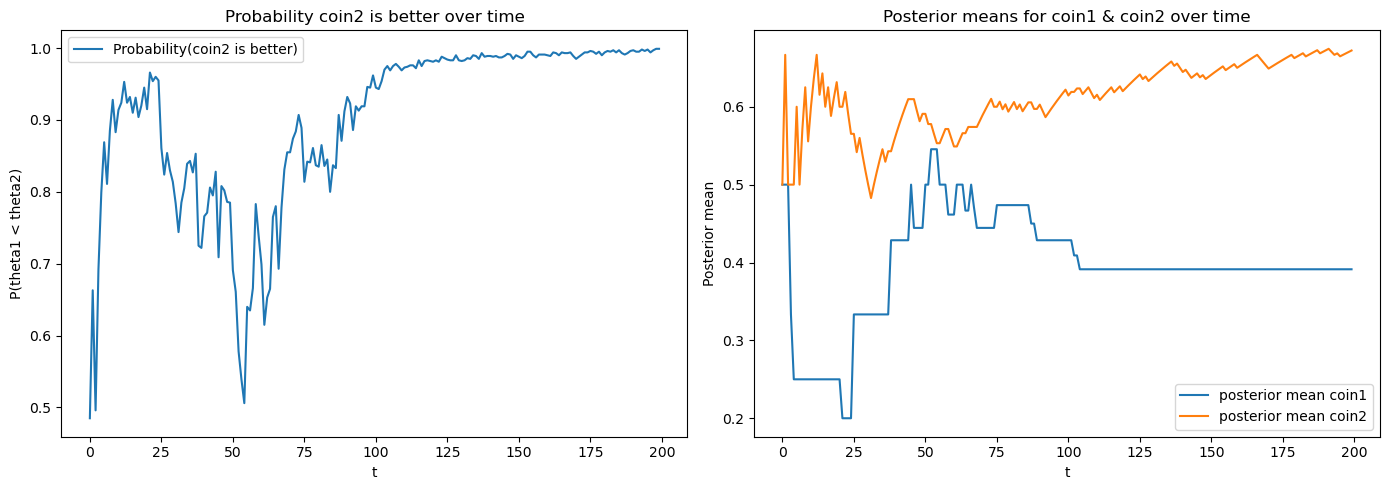

In [15]:
from scipy.stats import beta

# True success probabilities
theta1_true = 0.35
theta2_true = 0.70

# Prior hyperparameters for each coin (assume Beta(1,1) = Uniform)
alpha1, beta1 = 1, 1
alpha2, beta2 = 1, 1

# Tracking data
n1, x1 = 0, 0
n2, x2 = 0, 0

T = 200  # number of trials
choice_history = []
p_coin2_history = []
mean1_history, mean2_history = [], []

for t in range(T):
    # Posterior for coin 1: Beta(alpha1 + x1, beta1 + (n1 - x1))
    # Posterior for coin 2: Beta(alpha2 + x2, beta2 + (n2 - x2))
    post1 = beta(alpha1 + x1, beta1 + (n1 - x1))
    post2 = beta(alpha2 + x2, beta2 + (n2 - x2))
    
    # Compute P(theta_1 < theta_2) via sampling or direct integration
    # Let's do quick sampling:
    samples1 = post1.rvs(1000)
    samples2 = post2.rvs(1000)
    prob_theta2_bigger = np.mean(samples1 < samples2)
    
    # Decide which coin to flip:
    # Flip coin2 with probability = prob_theta2_bigger, coin1 otherwise
    if np.random.rand() < prob_theta2_bigger:
        # Flip coin2
        outcome = (np.random.rand() < theta2_true)  # 1 = success, 0 = fail
        n2 += 1
        x2 += outcome
        choice_history.append(2)
    else:
        # Flip coin1
        outcome = (np.random.rand() < theta1_true)
        n1 += 1
        x1 += outcome
        choice_history.append(1)
    
    # Record some stats
    p_coin2_history.append(prob_theta2_bigger)
    mean1_history.append(post1.mean())
    mean2_history.append(post2.mean())

# Visualization
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(p_coin2_history, label="Probability(coin2 is better)")
plt.xlabel("t")
plt.ylabel("P(theta1 < theta2)")
plt.title("Probability coin2 is better over time")
plt.legend()

plt.subplot(1,2,2)
plt.plot(mean1_history, label="posterior mean coin1")
plt.plot(mean2_history, label="posterior mean coin2")
plt.xlabel("t")
plt.ylabel("Posterior mean")
plt.title("Posterior means for coin1 & coin2 over time")
plt.legend()

plt.tight_layout()
plt.show()

### Q3

Generalize this process to a situation where there are three (not two) entitites with binary outcomes, each with differing chances of success of those binary outcomes. Compare two analyses simultaneously based on the same data: 
1. Analysis 1: data for each entity is analyzed independently in the beta-binomial manner described above
2. Analysis 2: data for all entities is analyzed together using a single Dirichlet-multinomial model

*Discuss which of the two approaches you think is most appropriate and describe an actual real world **AB testing** context where you could deploy this **Bayesian multi-armed bandit** to effectively balancing the **exploration-exploitation** tradeoff in that setting.*

**Solution:**

#### Analysis 1: Independent Beta-Binomial
1. **Setup**: We have three unknown success probabilities, $\theta_1, \theta_2, \theta_3$. Each is given a Beta prior, say $\mathrm{Beta}(\alpha_j, \beta_j)$.  
2. **Observations**: For each entity $j$, we record $n_j$ trials and $x_j$ successes. The posterior for $\theta_j$ is  
   $$\mathrm{Beta}\bigl(\alpha_j + x_j,\;\beta_j + (n_j - x_j)\bigr).$$
3. **Multi-armed Bandit (3-Arms)**: We would do something like:
   - At step $t$, decide which entity $j$ to allocate a trial to. Possibly select an arm according to some criterion (like "which entity is most likely to be best?" or random draws from each Beta posterior).  
   - Observe success/failure, update $(n_j, x_j)$, re-compute the Beta posterior for that arm.  
4. **Pros/Cons**:  
   - **Pro**: Simple, each arm is *independent*. Easy to code and interpret.  
   - **Con**: Misses potential correlations or shared structure between arms if such structure exists in reality.

#### Analysis 2: Dirichlet-Multinomial
1. **Setup**: Instead of viewing them as 3 separate Bernoulli processes, we imagine at each trial, *one* of the three outcomes "happens". This might be modeled with a **multinomial** distribution if exactly 1 of the 3 arms “succeeds” per trial.  
2. **Dirichlet** Prior: For a 3-category multinomial, a **Dirichlet**($\alpha_1, \alpha_2, \alpha_3$) prior is conjugate. The posterior after observing counts $(x_1, x_2, x_3)$ is:
   $$\mathrm{Dirichlet}\bigl(\alpha_1 + x_1,\;\alpha_2 + x_2,\;\alpha_3 + x_3\bigr).$$
3. **Interpretation**: This approach treats the probabilities $(\theta_1, \theta_2, \theta_3)$$ as part of the *same* distribution (they must sum to 1 if exactly one outcome happens each trial).  
4. **Pros/Cons**:  
   - **Pro**: If the data truly come from a single trial with 3 possible outcomes, the Dirichlet-multinomial approach is a *natural* representation and can capture that each trial leads to exactly one of the three arms being “chosen.”  
   - **Con**: If the arms are *actually run in separate contexts* or we want each arm to have a separate Bernoulli trial, forcing $\theta_1+\theta_2+\theta_3=1$ might be unnatural.

#### Which Is More Appropriate?
- If each arm’s success probability is truly a **separate** concept (like different versions of a website tested independently on separate subsets of users), then **Analysis 1** is typically more appropriate: each arm’s success is a separate Bernoulli event, and we are free to treat them independently.  
- If each trial can **only** result in exactly one arm’s success (like a user *must* choose exactly 1 of 3 possible ads, or we randomly serve exactly one of 3 website variants each time), the **Dirichlet-multinomial** approach might be more coherent, as it models the probability distribution over the 3 *mutually exclusive* outcomes in each trial.

#### Real-World **AB Testing** Example
- **Scenario**: Suppose an e-commerce site (say, Bansal Mart) wants to test 3 different **page designs** to see which yields the highest **conversion rate**. We do not know in advance which design is best.
- **Bayesian Multi-Armed Bandit** for **Exploration-Exploitation**:
  1. **Initial**: Start with a prior Beta (or Dirichlet, depending on how we view the sampling) for each design’s conversion probability.  
  2. **Traffic Allocation**: We begin by randomly assigning visitors among the 3 designs. We record successes (purchases) vs. failures (no purchase).  
  3. **Posterior Updates**: Over time, we update each design’s posterior distribution.  
  4. **Exploration**: Even if one design seems worse early on, we occasionally show it to gather more data—**explore**—in case the early data was misleading.  
  5. **Exploitation**: More often, we show the design that has higher posterior probability of having the best conversion rate, so we **exploit** our current knowledge.

Such an approach automatically “learns” which design is better while still allowing some sampling of the other designs. Over time, the design with truly higher $\theta$ gets the majority of traffic.

## Bayesian/Sequential Learning

A prior is updated to a posterior which becomes the new prior for the next data

\begin{array}{llll}
1.&&\!\!\!\!\!\!&\!\!\!\!\!\!p(\theta | x_1) \propto {} f(x_1|\theta)p(\theta) \\
2.&&\!\!\!\!\!\! p(\theta | x_1, x_2) \propto f(x_2|\theta)&\!\!\!\!\!\!p(\theta | x_1) \\
3.&p(\theta | x_1, x_2, x_3) \propto{} f(x_3|\theta) & \!\!\!\!\!\! p(\theta | x_1, x_2)  \\
\vdots\\
\end{array}

### But this is the same as a single batch update

$$p(\theta | x_1, x_2, x_3) \propto f(x_1,x_2,x_3|\theta)p(\theta)
\overset{(x_i \perp\!\!\perp x_j | \theta)}{=} \underbrace{f(x_1|\theta)f(x_2|\theta)f(x_3|\theta)p(\theta)}_{\left[ \prod_{i=1}^{3}f(x_i|\theta)\right]p(\theta)} $$

## Conditional Independence

\begin{align*}
\text{Conditional Independence} && p(x_2|\theta) &={} p(x_2|x_1,\theta) \; \text{ or } \; (x_2 \perp\!\!\!\perp x_1 | \theta)
\end{align*}

\begin{align*}
p(\theta|x_2,x_1) &\propto{} p(x_2, x_1, \theta)\\
& = {} \underbrace{p(x_2| \theta, x_1)} p(x_1 | \theta) p(\theta)
\color{gray}{\longleftarrow \text{chain rule}}\\
& \quad (x_2 \perp\!\!\!\perp x_1 | \theta)\\
& = {} \overbrace{\;\;p(x_2| \theta)\;\;} \underbrace{p(x_1 | \theta) p(\theta)}_{\propto \; p(\theta|x_1)}\\
&\propto{}  p(x_2| \theta) \underbrace{p(\theta | x_1)}_{\text{new prior}} \longleftarrow \text{previous posterior}
\end{align*}

A prior is updated to a posterior which becomes the new prior for the next data